<a href="https://colab.research.google.com/github/ChanyutJean/2143488-Big-Data-AI-HW/blob/main/Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Modelling

In [2]:
# Don't forget to import data!
import pandas as pd
df = pd.read_csv("HW3_movie_metadata.csv")

In [3]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.isna())

       director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fant

In [4]:
df2 = df.copy()
df2 = df2.dropna(subset = ['imdb_score'])
df2 = df2._get_numeric_data()
df2 = df2.fillna(df2.median())
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     5043 non-null   float64
 1   duration                   5043 non-null   float64
 2   director_facebook_likes    5043 non-null   float64
 3   actor_3_facebook_likes     5043 non-null   float64
 4   actor_1_facebook_likes     5043 non-null   float64
 5   gross                      5043 non-null   float64
 6   num_voted_users            5043 non-null   int64  
 7   cast_total_facebook_likes  5043 non-null   int64  
 8   facenumber_in_poster       5043 non-null   float64
 9   num_user_for_reviews       5043 non-null   float64
 10  budget                     5043 non-null   float64
 11  title_year                 5043 non-null   float64
 12  actor_2_facebook_likes     5043 non-null   float64
 13  imdb_score                 5043 non-null   float

In [5]:
lo_bound = df2['imdb_score'].quantile(0.4)
hi_bound = df2['imdb_score'].quantile(0.6)

lo_data = df2[df2['imdb_score'] <= lo_bound]
lo_data['imdb_score'].loc[:] = 0 #LOW

hi_data = df2[df2['imdb_score'] >= hi_bound]
hi_data['imdb_score'].loc[:] = 1 #HIGH

df3 = pd.concat([lo_data, hi_data], axis=0)
df3['imdb_score'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1.0    2133
0.0    2115
Name: imdb_score, dtype: int64

In [6]:
X = df3.drop(columns='imdb_score')
y = df3[['imdb_score']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 6 to 5039
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4248 non-null   float64
 1   duration                   4248 non-null   float64
 2   director_facebook_likes    4248 non-null   float64
 3   actor_3_facebook_likes     4248 non-null   float64
 4   actor_1_facebook_likes     4248 non-null   float64
 5   gross                      4248 non-null   float64
 6   num_voted_users            4248 non-null   int64  
 7   cast_total_facebook_likes  4248 non-null   int64  
 8   facenumber_in_poster       4248 non-null   float64
 9   num_user_for_reviews       4248 non-null   float64
 10  budget                     4248 non-null   float64
 11  title_year                 4248 non-null   float64
 12  actor_2_facebook_likes     4248 non-null   float64
 13  aspect_ratio               4248 non-null   float

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,stratify=y,random_state=100)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

# 1. Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(criterion='entropy', max_depth=4, ccp_alpha=0.05, max_features='log2', n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_pred = rfc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Classification Report: 
               precision    recall  f1-score   support

         LOW       0.67      0.77      0.72       635
        HIGH       0.74      0.63      0.68       640

    accuracy                           0.70      1275
   macro avg       0.70      0.70      0.70      1275
weighted avg       0.70      0.70      0.70      1275
 

Accuracy on train:
 0.692
Accuracy on test:
 0.7


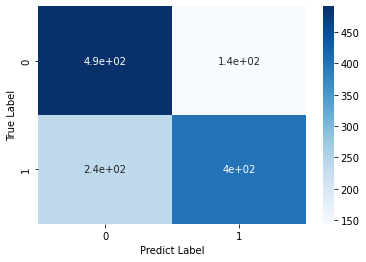

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
print("Classification Report: \n", metrics.classification_report(y_test,y_pred,target_names=('LOW', 'HIGH')),'\n')
print("Accuracy on train:\n",metrics.accuracy_score(y_train,y_train_pred).round(3))
print("Accuracy on test:\n",metrics.accuracy_score(y_test,y_pred).round(3))
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

# 2. Gradient Boost

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=1, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
y_train_pred = gbc.predict(X_train)
y_pred = gbc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 
               precision    recall  f1-score   support

         LOW       0.73      0.84      0.78       635
        HIGH       0.81      0.70      0.75       640

    accuracy                           0.77      1275
   macro avg       0.77      0.77      0.77      1275
weighted avg       0.77      0.77      0.77      1275
 

Accuracy on train:
 0.779
Accuracy on test:
 0.768


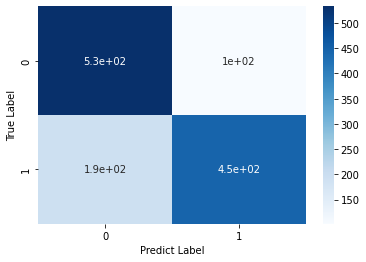

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
print("Classification Report: \n", metrics.classification_report(y_test,y_pred,target_names=('LOW', 'HIGH')),'\n')
print("Accuracy on train:\n",metrics.accuracy_score(y_train,y_train_pred).round(3))
print("Accuracy on test:\n",metrics.accuracy_score(y_test,y_pred).round(3))
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

# 3. Voting

In [20]:
# Remove multi-collinearity
X_train = X_train.drop(columns=['actor_1_facebook_likes', 'num_user_for_reviews'])
X_test = X_test.drop(columns=['actor_1_facebook_likes', 'num_user_for_reviews'])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

v1 = LogisticRegression()
v2 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
v3 = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
v4 = MLPClassifier(hidden_layer_sizes=(28), activation="relu", solver='adam', random_state=1, max_iter=1000)
v5 = SVC(C=100, gamma=1, random_state=1)

In [22]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[ ('Logistic Regression', v1), \
                                   ('Decision Tree', v2), \
                                   ('K Nearest Neighbors', v3), \
                                   ('Neural Network',v4), \
                                   ('Support Vector', v5) ], voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)

In [23]:
vc.fit(X_train, y_train)
y_train_pred = vc.predict(X_train)
y_pred = vc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 
               precision    recall  f1-score   support

         LOW       0.73      0.87      0.79       635
        HIGH       0.84      0.67      0.75       640

    accuracy                           0.77      1275
   macro avg       0.78      0.77      0.77      1275
weighted avg       0.79      0.77      0.77      1275
 

Accuracy on train:
 0.768
Accuracy on test:
 0.773


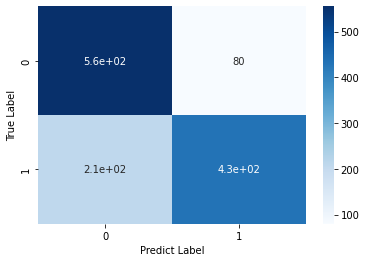

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
print("Classification Report: \n", metrics.classification_report(y_test,y_pred,target_names=('LOW', 'HIGH')),'\n')
print("Accuracy on train:\n",metrics.accuracy_score(y_train,y_train_pred).round(3))
print("Accuracy on test:\n",metrics.accuracy_score(y_test,y_pred).round(3))
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()